In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

#### LOAD THE DATA FILE

In [3]:
telco_raw_data = pd.read_csv('Telco-Customer-Churn.csv')

#### LOOK AT THE HEAD OF THE DATA 

In [5]:
telco_raw_data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

#### CHECK THE VARIOUS ATTRIBUTES OF DATA LIKE SHAPE, COLUMNS, DATATYPES

In [7]:
telco_raw_data.shape

(7043, 21)

In [8]:
telco_raw_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [9]:
#Checking the data types of all columns
telco_raw_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
#Checking the descriptive statistics of numeric variables
telco_raw_data.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

Senior Citizen is actually a categorical hence the 25%-50%-75 & distribution is not proper

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 where as 25% customers pay more than USD 89.85 per month

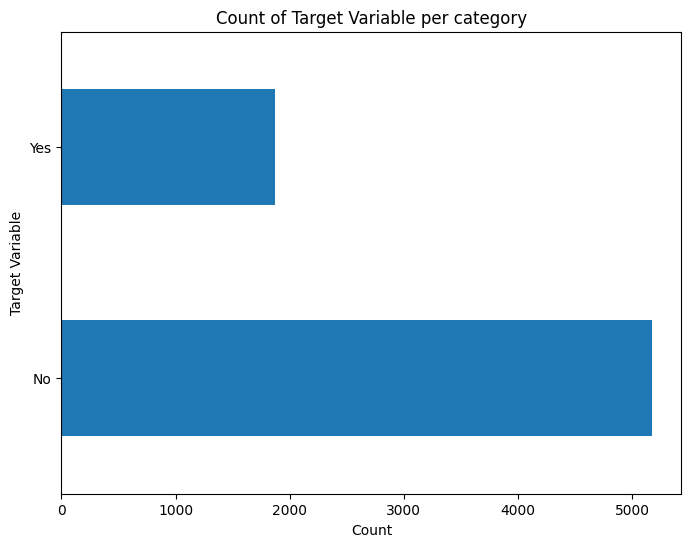

In [12]:
telco_raw_data['Churn'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count")
plt.ylabel("Target Variable")
plt.title("Count of Target Variable per category")
plt.show()

In [13]:
telco_raw_data['Churn'].value_counts() 

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [14]:
telco_raw_data['Churn'].value_counts() / len(telco_raw_data["Churn"]) * 100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

- Data is highly imbalanced
- Ratio (non-churner to churner) = 73:27
- So we analyze the data with other features while taking then target values separately to get some insights

In [16]:
# Checking for any null values
telco_raw_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Total Charges is type object

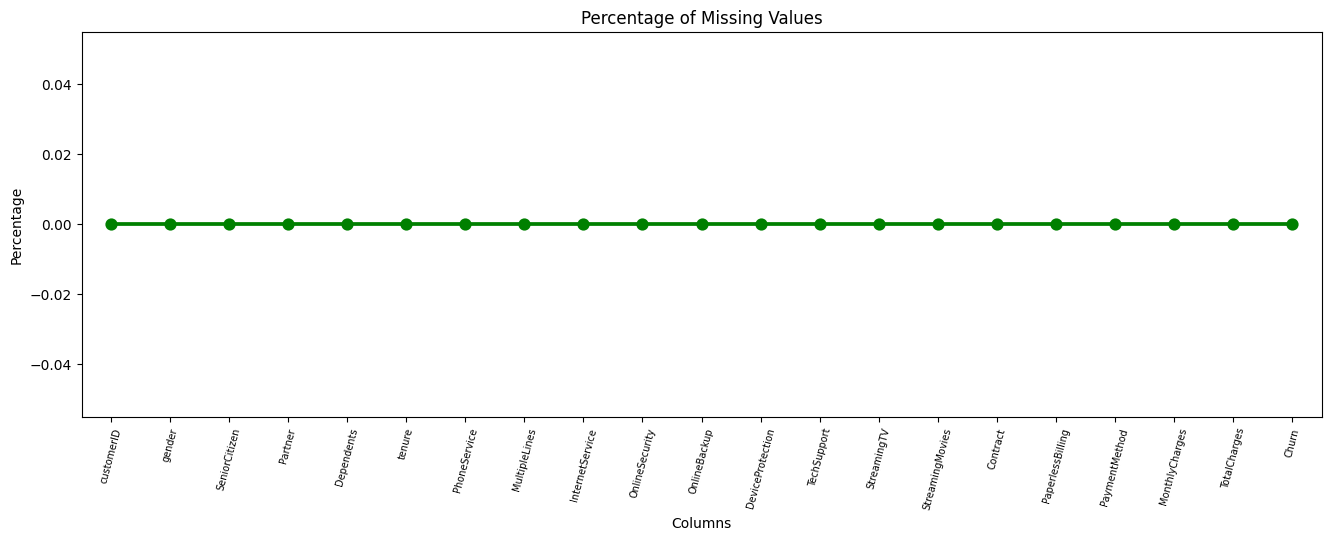

In [18]:
# Reusable code to visualize any missing or null values in columns

missing_values = pd.DataFrame((telco_raw_data.isnull().sum()) * telco_raw_data.shape[0] / 100 ).reset_index()
missing_values.columns = ['Column', 'Percentage']
plt.figure(figsize = (16,5))

sns.pointplot(x='Column' , y ='Percentage', data = missing_values, color = 'green')

plt.xticks(rotation=75, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.xlabel("Columns")

plt.show()

We don't see any missing values

# Data Cleaning

- Copying the raw data for manipulation and processing

In [22]:
telco_data = telco_raw_data.copy()

- Converting Total Charges from type object to type float

In [24]:
telco_data['TotalCharges'] = pd.to_numeric(telco_data["TotalCharges"], errors = 'coerce')
telco_data.isnull().sum() #Rechecking for any null

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 null values in Total Charges.

In [26]:
telco_data.loc[telco_data['TotalCharges'].isnull() == True]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

__Treating the Missing Values__

Since there are just 11 out of 7043 records (0.15%), it is safe to drop the column.

In [29]:
#Removing the null values
telco_data.dropna(how='any', inplace=True)

In [30]:
telco_data['tenure'].max()

np.int64(72)

Dividing customers into different bins according to tenure and adding a new column called 'tenure_group'
It changes continious variable to categorical variable helping to analyse efficiently.
For example: tenure between 1 to 2 years assign 1-13, or 12-24 and so on.

In [32]:
# Grouping the tenure in bins of 12 months
labels = ["{0} - {1} ".format(i, i+11) for i in range(1,72,12)]
labels

['1 - 12 ', '13 - 24 ', '25 - 36 ', '37 - 48 ', '49 - 60 ', '61 - 72 ']

In [33]:
telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1,80,12), right = False, labels=labels)

In [34]:
telco_data.tenure_group.value_counts()

tenure_group
1 - 12      2175
61 - 72     1407
13 - 24     1024
25 - 36      832
49 - 60      832
37 - 48      762
Name: count, dtype: int64

In [35]:
telco_data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...         Yes   
4                No     Fiber optic             No  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges  Churn  tenure_group  
0           Electronic check          29.85        29.85     No       1 - 12   
1               Mailed check          56.95      1889.50     No      25 - 36   
2               Mailed check          53.85       108.15    Yes       1 - 12   
3  Bank transfer (automatic)          42.30      1840.75     No      37 - 48   
4           Electronic check          70.70       151.65    Yes       1 - 12   

[5 rows x 22 columns]

__Removing Columns which are not required for processing__
- We don't need customerID because it does not play a significant role.
- We also dont need tenure because we created the tenure_group.

In [37]:
#Dropping columns customerID and tenure
telco_data.drop(columns = ['customerID','tenure'], axis = 1, inplace = True)
telco_data.head()

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges Churn tenure_group  
0           Electronic check           29.85         29.85    No      1 - 12   
1               Mailed check           56.95       1889.50    No     25 - 36   
2               Mailed check           53.85        108.15   Yes      1 - 12   
3  Bank transfer (automatic)           42.30       1840.75    No     37 - 48   
4           Electronic check           70.70        151.65   Yes      1 - 12

# Data Exploration

__Plotting the distribution of individual features by churn__

#### Univariate Analysis

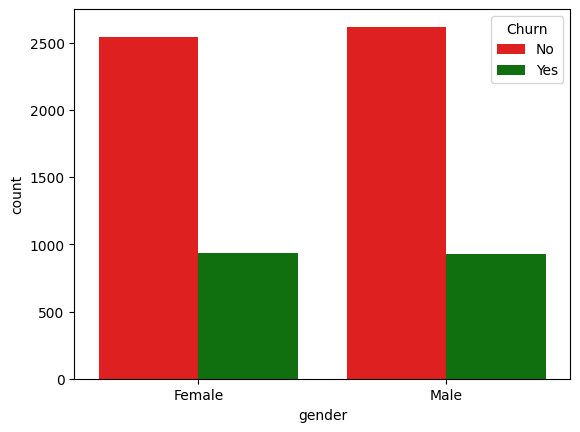

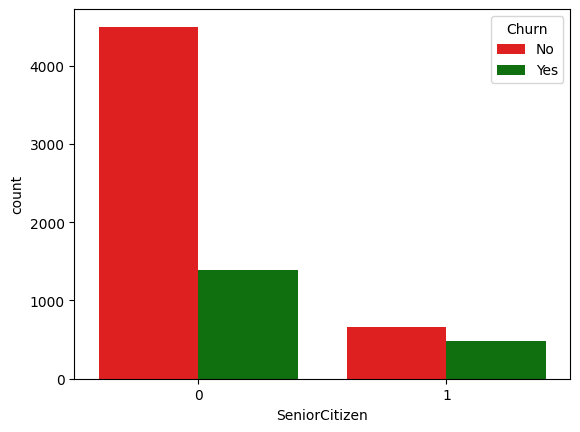

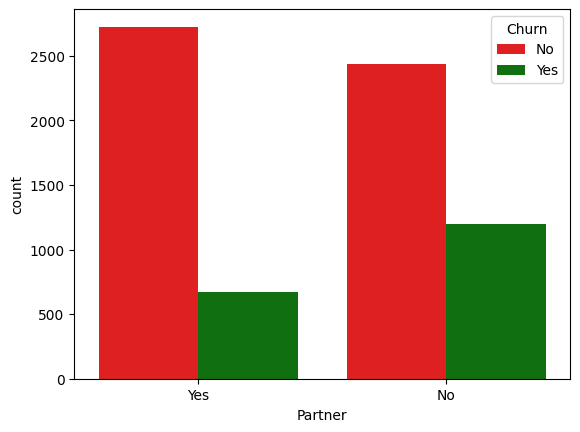

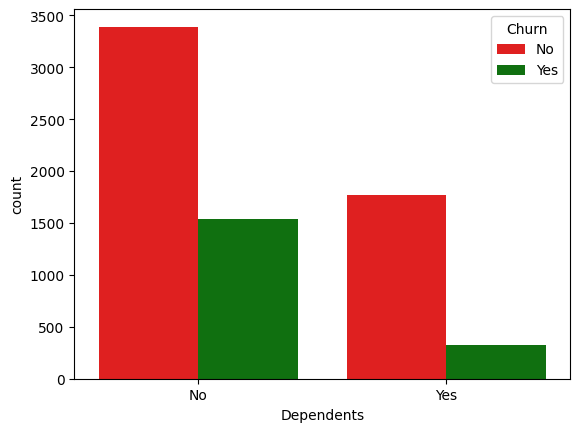

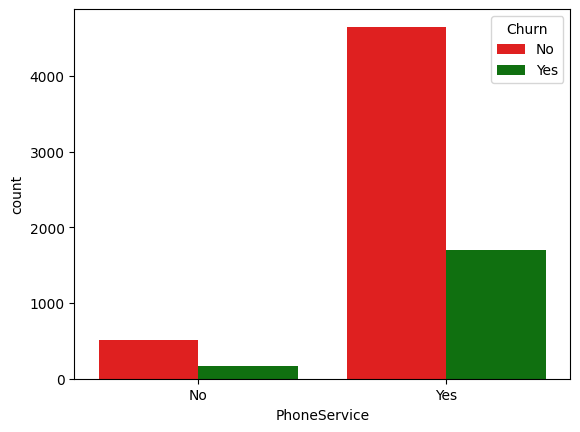

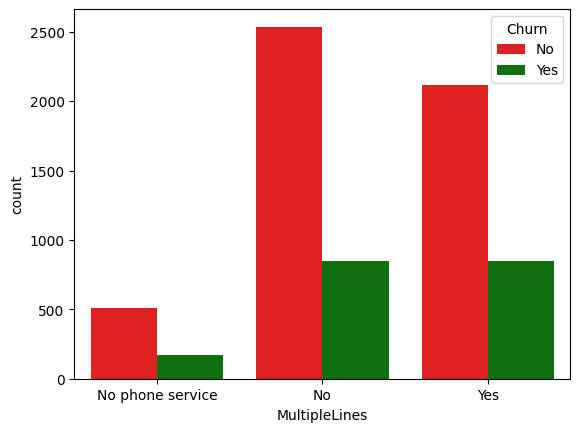

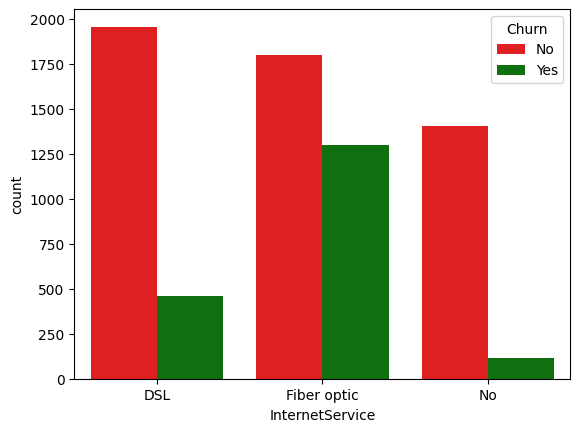

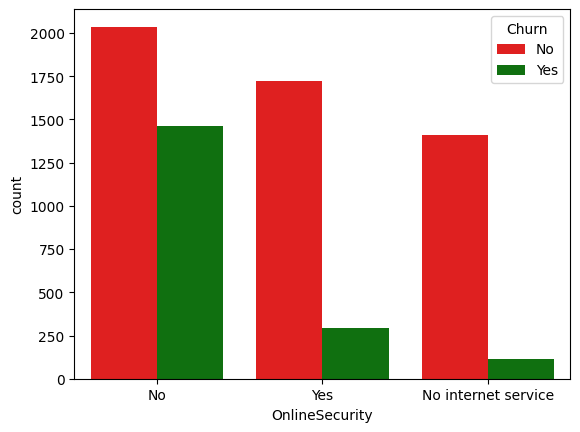

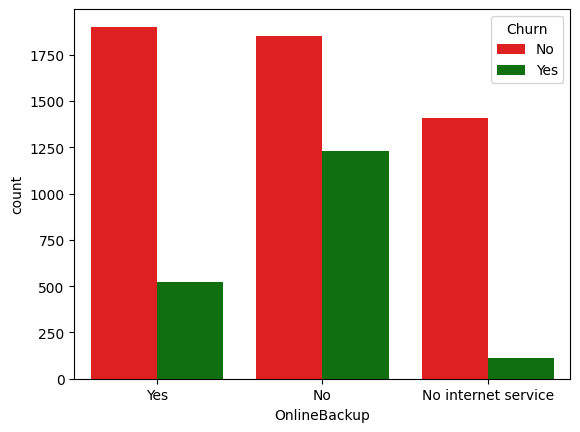

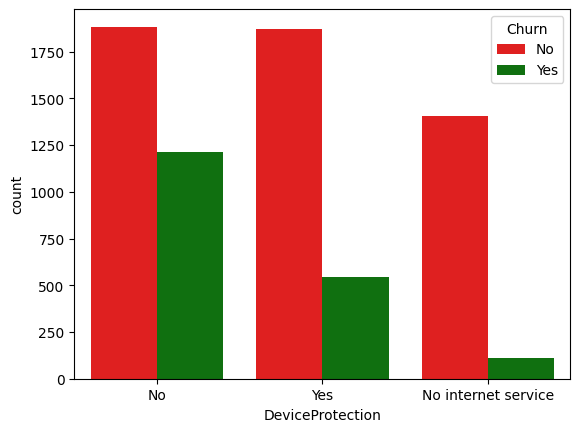

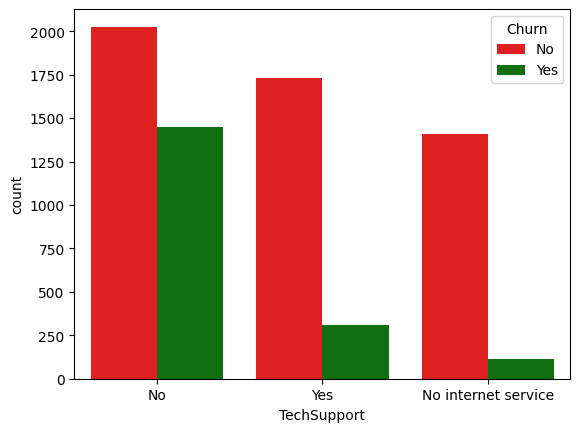

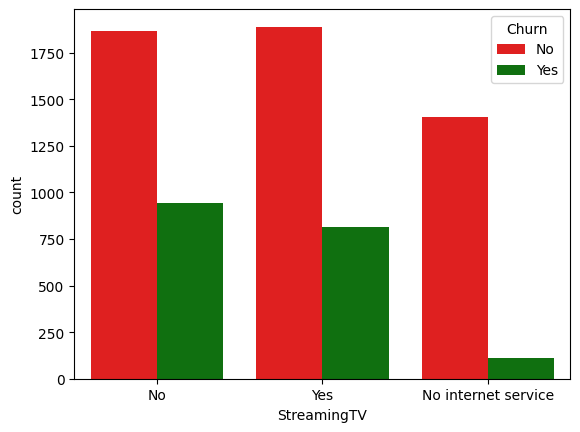

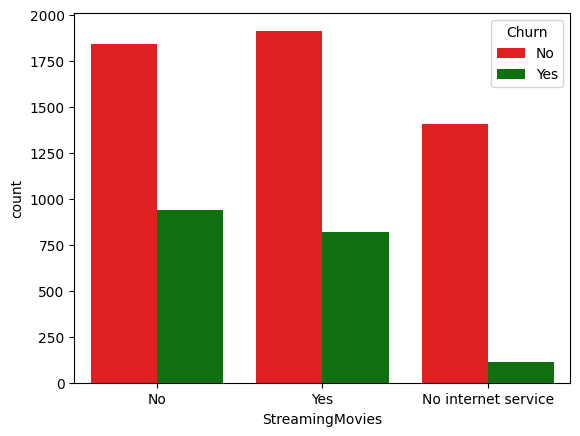

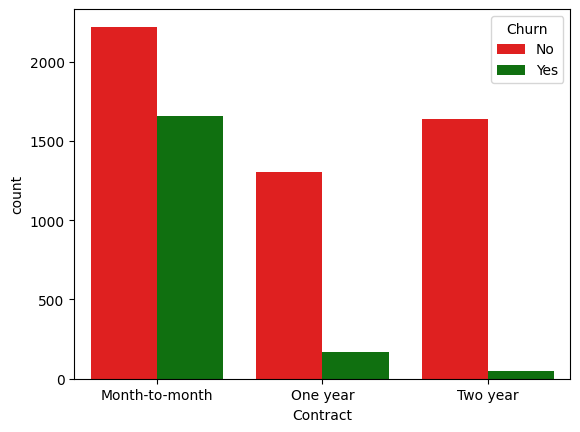

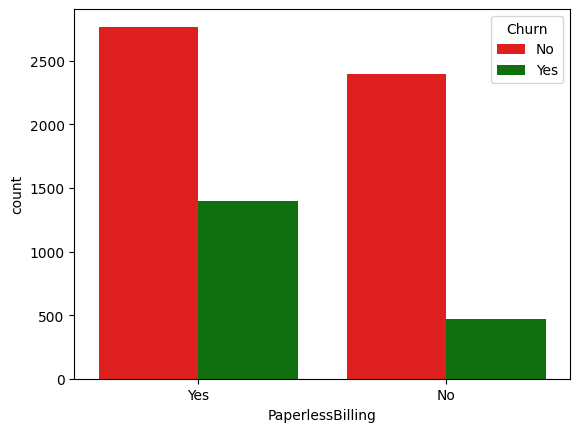

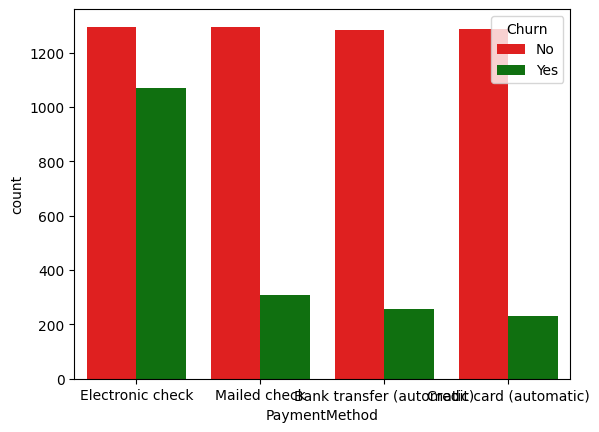

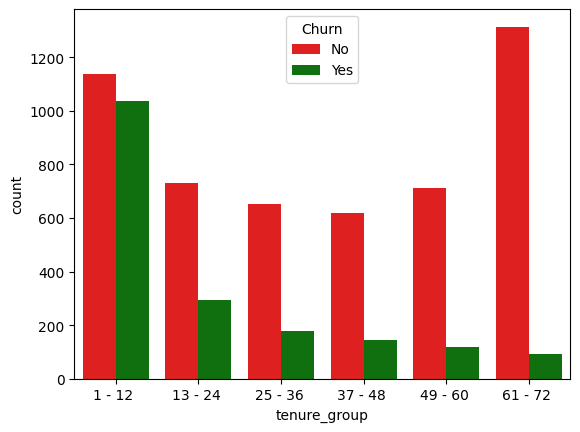

In [41]:
#This drops the columns and resulting DataFrame will contain only the features that we want to analyze.
for i, features in enumerate(telco_data.drop(columns= ['Churn','MonthlyCharges','TotalCharges'])): 
    plt.figure(i)
    sns.countplot(data=telco_data, x = features, hue = 'Churn', palette={'Yes':'green','No':'red'})

__Converting the target variable Churn into a binary numeric variable (Yes=1, No=0)__

In [43]:
telco_data['Churn'] = np.where(telco_data.Churn=='Yes',1,0)

In [44]:
telco_data.head()

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges  Churn tenure_group  
0           Electronic check           29.85         29.85      0      1 - 12   
1               Mailed check           56.95       1889.50      0     25 - 36   
2               Mailed check           53.85        108.15      1      1 - 12   
3  Bank transfer (automatic)           42.30       1840.75      0     37 - 48   
4           Electronic check           70.70        151.65      1      1 - 12

__Converting all the categorical variables into dummy variables using ONE HOT ENCODING__

In [46]:
telco_dummies = pd.get_dummies(telco_data)
telco_dummies.head()

SeniorCitizen  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0           29.85         29.85      0           True   
1              0           56.95       1889.50      0          False   
2              0           53.85        108.15      1          False   
3              0           42.30       1840.75      0          False   
4              0           70.70        151.65      1           True   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
0        False       False         True           True           False  ...   
1         True        True        False           True           False  ...   
2         True        True        False           True           False  ...   
3         True        True        False           True           False  ...   
4        False        True        False           True           False  ...   

   PaymentMethod_Bank transfer (automatic)  \
0                                    False   
1                                    False   
2                                    False   
3                                     True   
4                                    False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  tenure_group_1 - 12   tenure_group_13 - 24   \
0                       False                  True                  False   
1                        True                 False                  False   
2                        True                  True                  False   
3                       False                 False                  False   
4                       False                  True                  False   

   tenure_group_25 - 36   tenure_group_37 - 48   tenure_group_49 - 60   \
0                  False                  False                  False   
1                   True                  False                  False   
2                  False                  False                  False   
3                  False                   True                  False   
4                  False                  False                  False   

   tenure_group_61 - 72   
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  

[5 rows x 51 columns]

__Relationship between Monthly Charges and Total Charges__

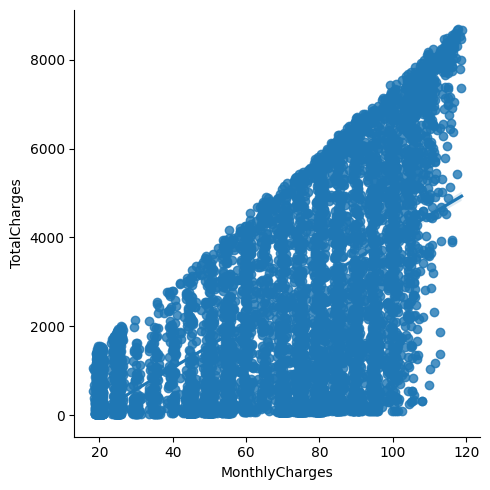

In [48]:
sns.lmplot(data = telco_dummies , x='MonthlyCharges' , y="TotalCharges")
plt.show()

Total Charges increases as Monthly Charges increases which makes them highly correlated.

__Churn by Monthly Charges and Total Charges__

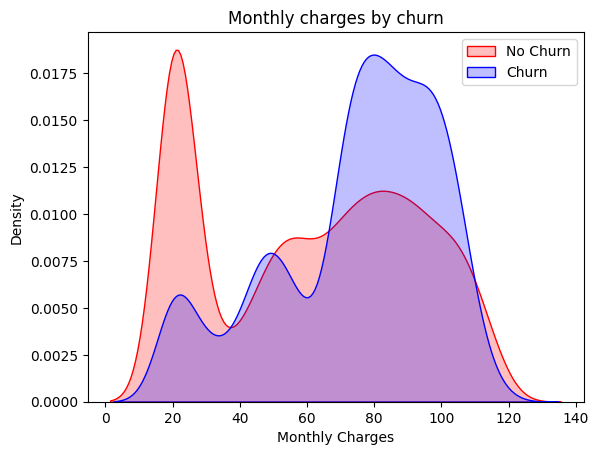

In [51]:
graph_monthly = sns.kdeplot(telco_dummies.MonthlyCharges[(telco_dummies["Churn"] == 0) ],
                color="Red", fill = True)
graph_monthly = sns.kdeplot(telco_dummies.MonthlyCharges[(telco_dummies["Churn"] == 1) ],
                ax = graph_monthly, color="Blue", fill= True)
graph_monthly.legend(["No Churn","Churn"])
graph_monthly.set_ylabel('Density')
graph_monthly.set_xlabel('Monthly Charges')
graph_monthly.set_title('Monthly charges by churn')
plt.show()

__Insight from this:__ Churn is high when Monthly Charges are high

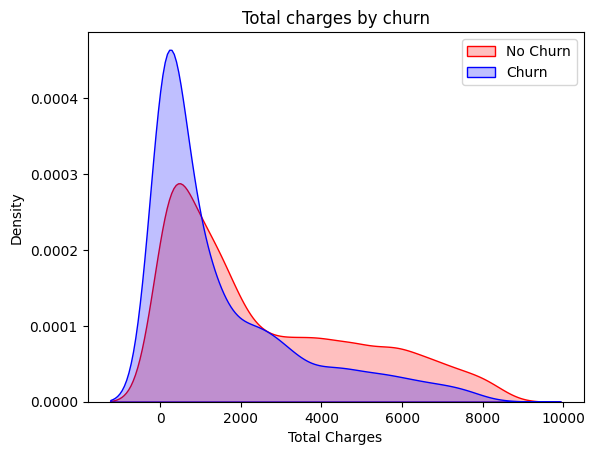

In [53]:
graph_total = sns.kdeplot(telco_dummies.TotalCharges[(telco_dummies["Churn"] == 0) ],
                color="Red", fill = True)
graph_total = sns.kdeplot(telco_dummies.TotalCharges[(telco_dummies["Churn"] == 1) ],
                ax = graph_total, color="Blue", fill= True)
graph_total.legend(["No Churn","Churn"])
graph_total.set_ylabel('Density')
graph_total.set_xlabel('Total Charges')
graph_total.set_title('Total charges by churn')
plt.show()

__Insight from this__ : Surprisingly, there is higher Churn at lower Total Charges

## Analysis

__Combining Insights from Multiple Parameters:__
To understand the reason behind this observation, we look at three parameters together:

__Tenure__: The length of time a customer has been with the service.

__Monthly Charges__: The monthly fee a customer pays.

__Total Charges__: The cumulative amount a customer has paid over their tenure.

---
__Combined Analysis:__ Tenure, Monthly Charges, and Total Charges

__Higher Monthly Charge at Lower Tenure:__ Customers who are relatively new (lower tenure) but have high monthly charges.

__Lower Total Charge:__ Because these customers have been with the service for a short period, their cumulative total charges are low, even though their monthly charges are high.

Hence, all these 3 factors __Higher Monthly Charge__, __Lower Tenure__, and __Lower Total Charge__ are linked to __High Churn__

---

__Building a corelation of all features with Churn__

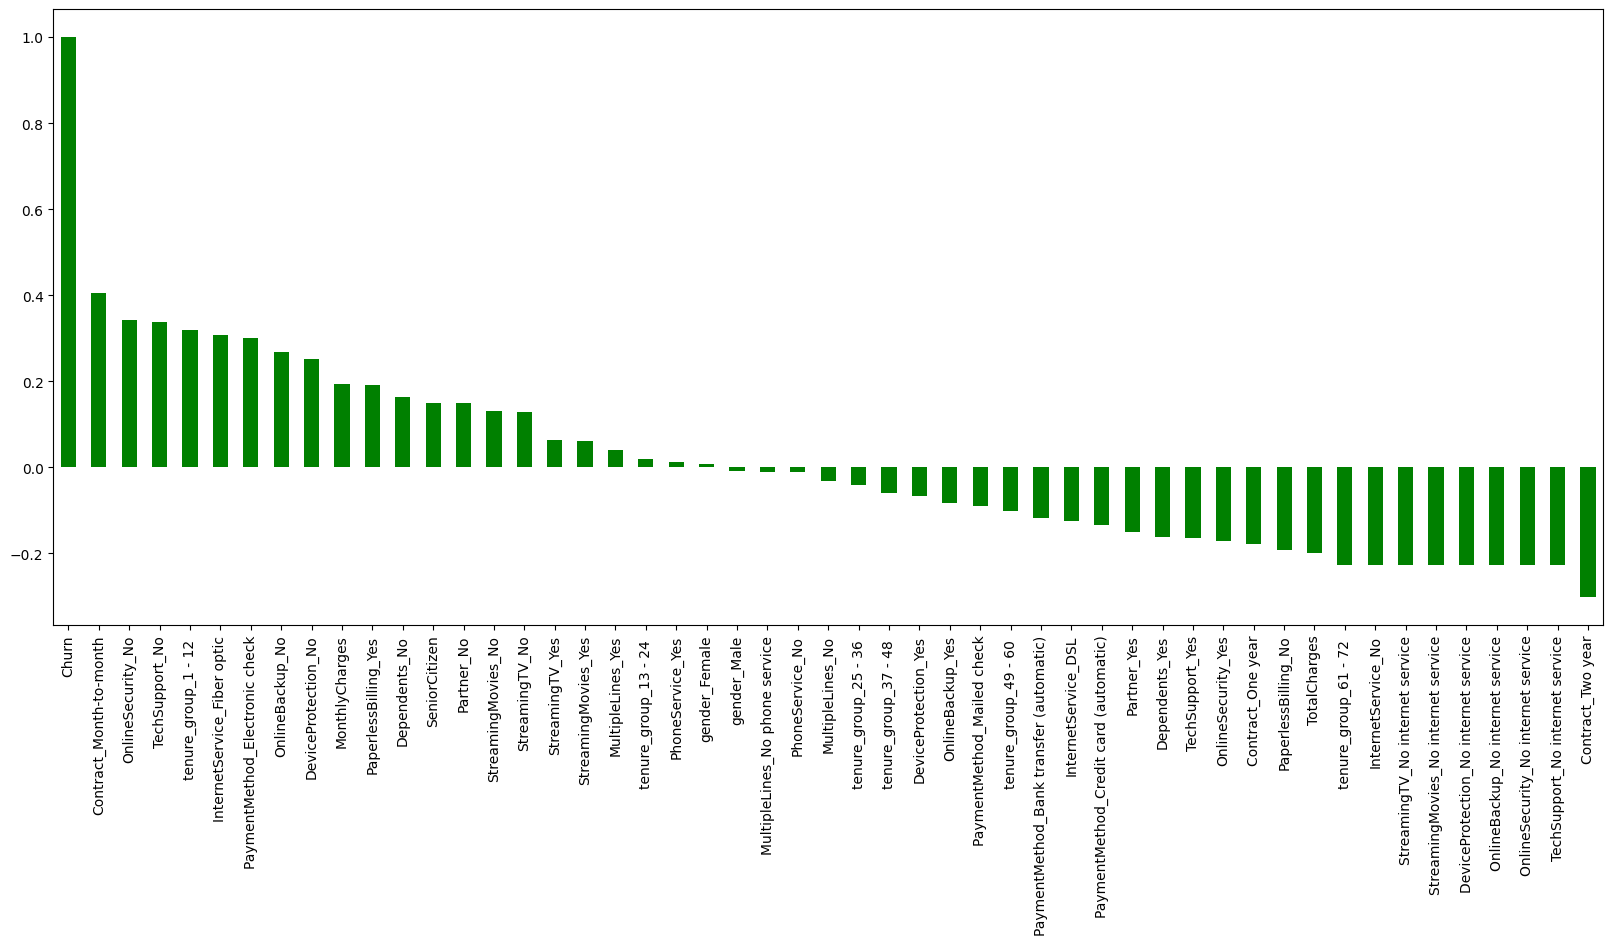

In [58]:
plt.figure(figsize=(20,8))
telco_dummies.corr()["Churn"].sort_values(ascending=False).plot(kind='bar' , color = 'green')
plt.xticks(rotation = 90 )
plt.show()

__Insight from this__: 

__HIGH Churn__ seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

__LOW Churn__ is seen in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below

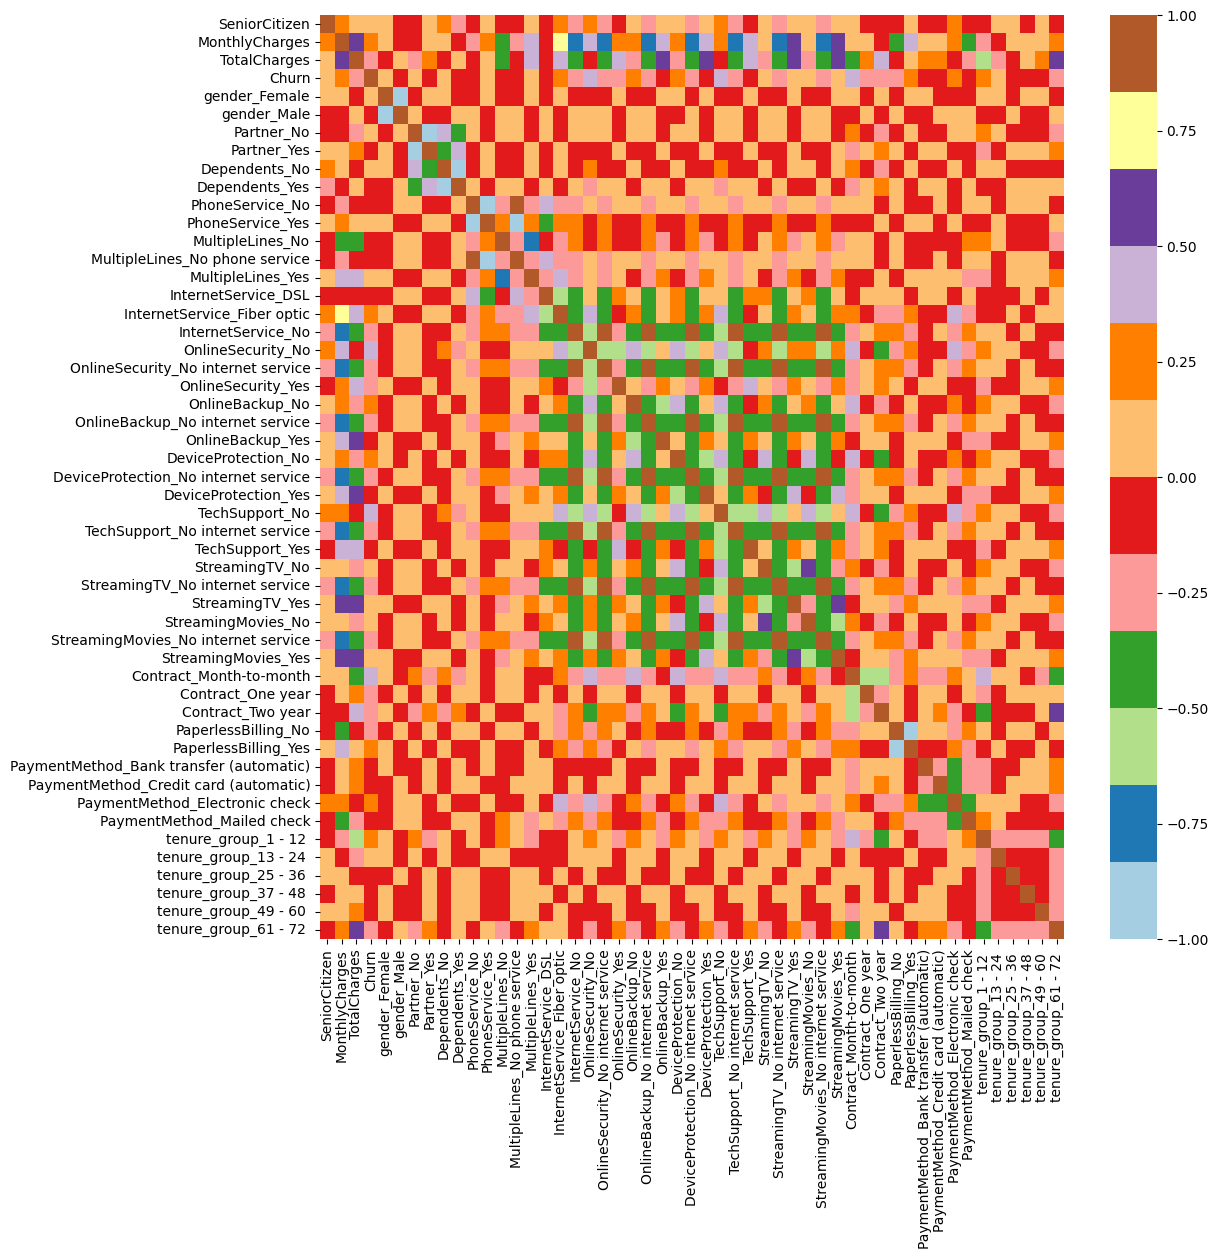

In [60]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_dummies.corr(), cmap="Paired")
plt.show()

## Bivariate Analysis

In [62]:
non_churners = telco_data.loc[telco_data["Churn"] == 0]
churners = telco_data.loc[telco_data["Churn"] == 1]

In [63]:
def uniplot(df,col,title,hue =None):
    plt.figure(figsize = (10,6))
    sns.countplot(data=df, x = col, hue=hue, palette = 'bright')
    plt.yscale('log')
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title=hue)
    plt.show()

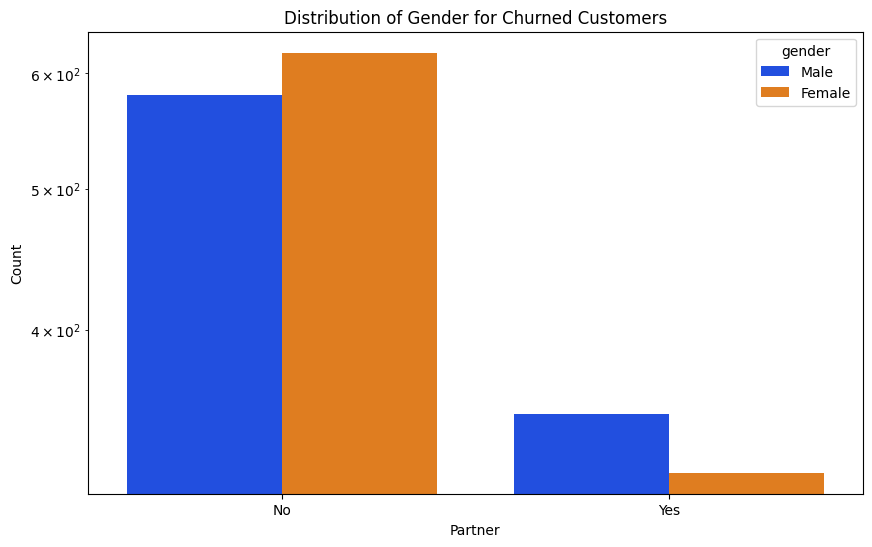

In [64]:
uniplot(churners, 'Partner', 'Distribution of Gender for Churned Customers', 'gender')

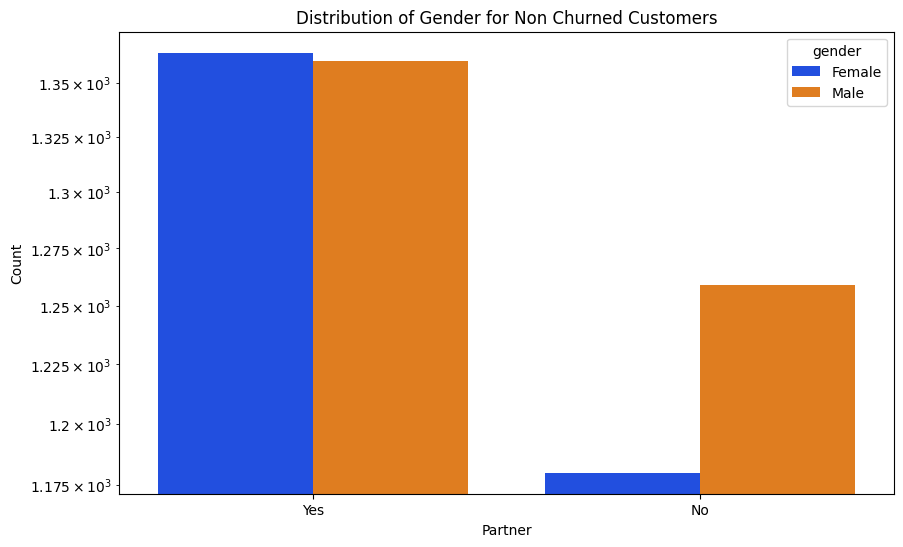

In [65]:
uniplot(non_churners,'Partner','Distribution of Gender for Non Churned Customers', 'gender')

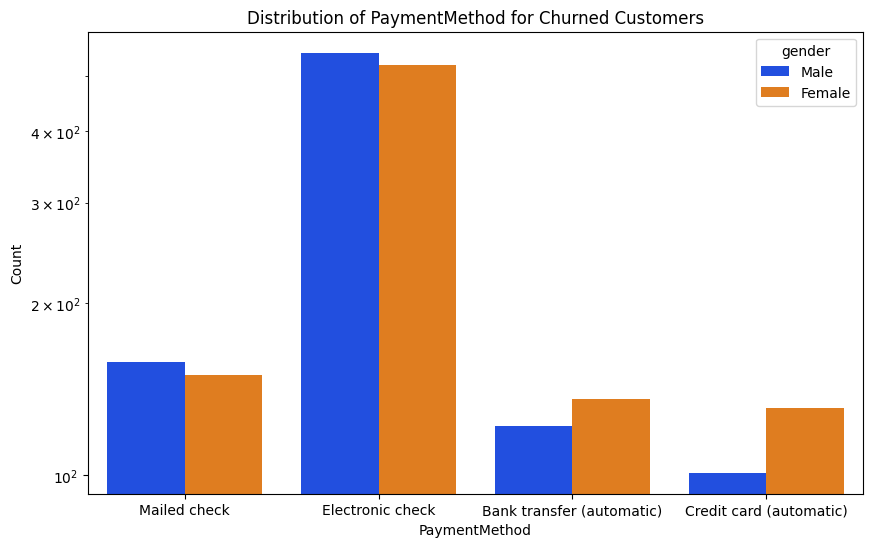

In [66]:
uniplot(churners,'PaymentMethod','Distribution of PaymentMethod for Churned Customers','gender')

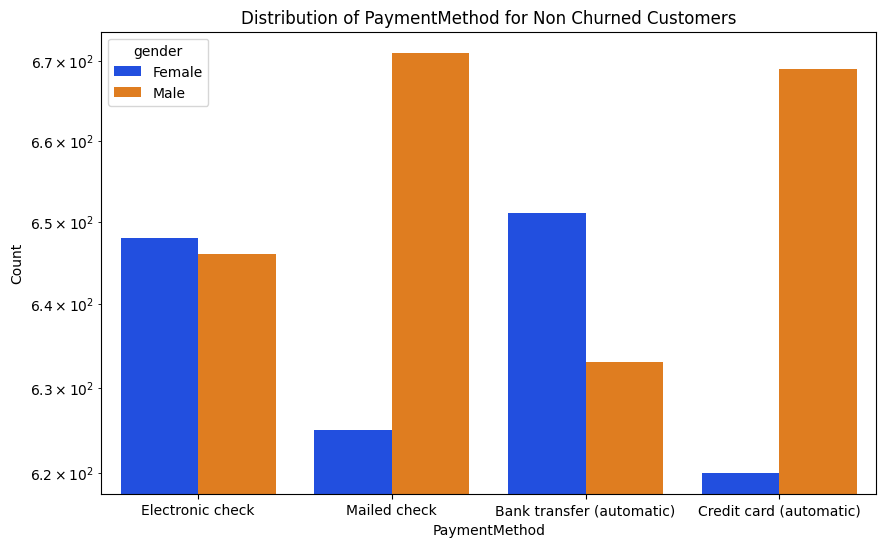

In [67]:
uniplot(non_churners,'PaymentMethod','Distribution of PaymentMethod for Non Churned Customers','gender')

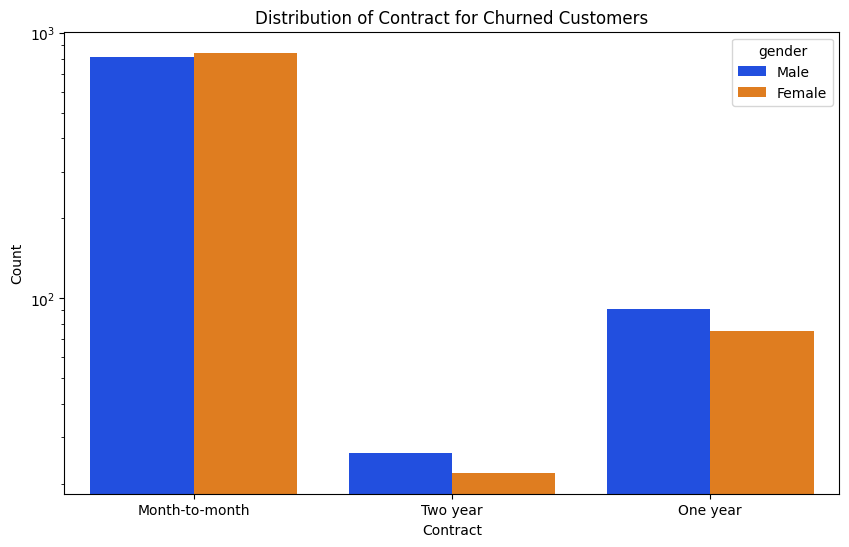

In [68]:
uniplot(churners,'Contract','Distribution of Contract for Churned Customers','gender')

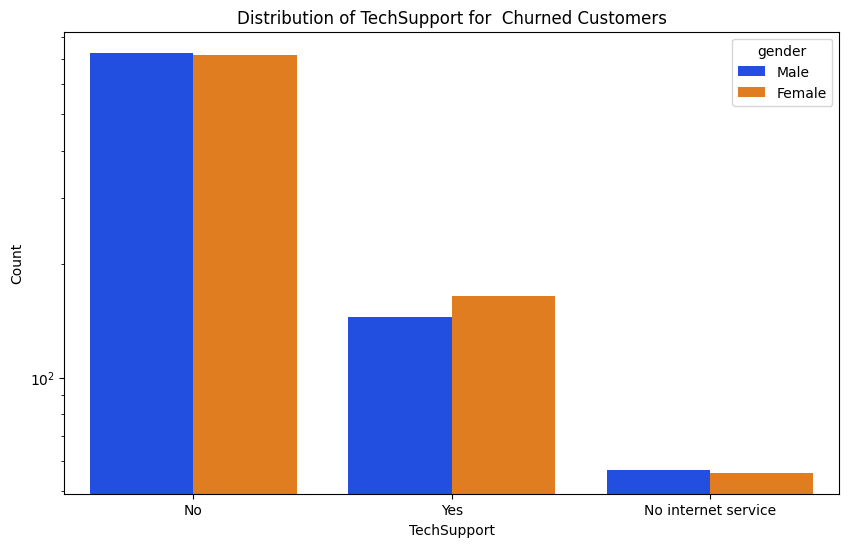

In [69]:
uniplot(churners,'TechSupport','Distribution of TechSupport for  Churned Customers','gender')

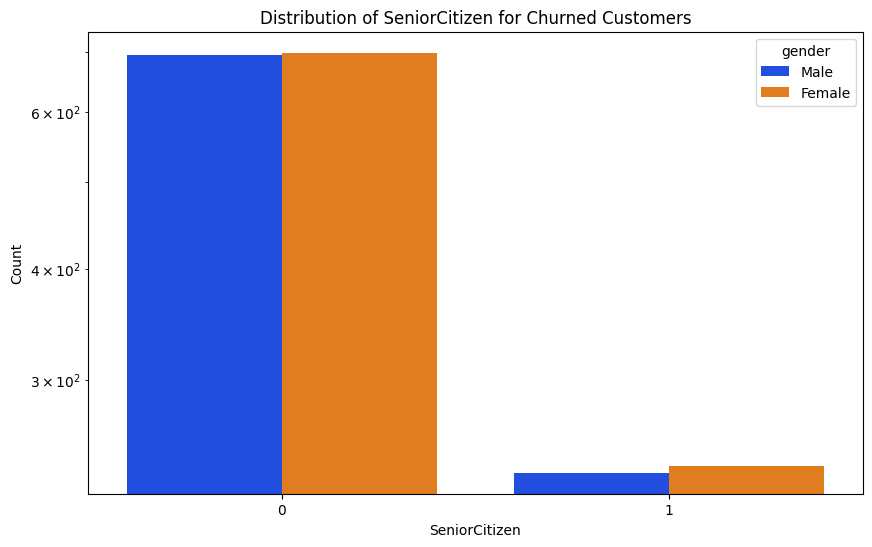

In [70]:
uniplot(churners,'SeniorCitizen','Distribution of SeniorCitizen for Churned Customers','gender')

# Conclusion

1. Electronic Check medium are highest churner

2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.

3. No Online security, No Tech Support category are high churners

4. Non senior Citizens are high churners


In [72]:
telco_dummies.to_csv('telco_churn.csv') # Exporting the dummies to a csv for model building